In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing  # for label encoding
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import datetime

import warnings
warnings.filterwarnings('ignore')

## Loading the Training & Testing data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
id_1 = test['Id'] # for submission process

# Removing Outliers

## Removing unusual values i.e. Gr Live Area > 4000

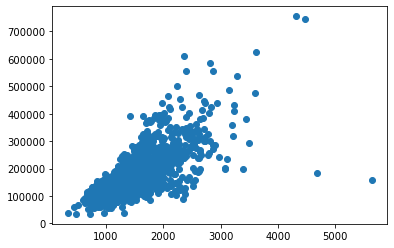

In [3]:
fig = plt.scatter(y = train['SalePrice'], x = train['GrLivArea'])

In [4]:
train = train[train['GrLivArea']<4000]

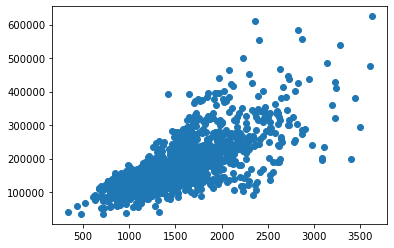

In [5]:
fig = plt.scatter(y = train['SalePrice'], x = train['GrLivArea'])

## Missing Value Analysis
### Training data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

In [7]:
# 'LotFrontage' is a continuous variable which has missing values and can be replaced with the mean value

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)

# Missing values for Alley are for those rows where there is 'No Alley' so set that to None and not NA values 
train['Alley'].fillna('None', inplace=True)

# Missing values for MasVnrType are for those rows where there is 'No Masonry' so set that to None and not NA values 
train['MasVnrType'].fillna('None', inplace=True)
train['MasVnrArea'] = np.where(train['MasVnrType']=='None', 0, train['MasVnrArea'])

# If we look at the five variables related to Basement - 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
# 'BsmtFinType2' that have missing values. We can see that Python is recognising 1419 values but the remaining 
# 37 variables are assumed to be missing which isnt correct in this case. As per the data description 
# 'NA' means there is 'No basement', so we cant exclude that variable or change the type as that is a feature
# that a buyer will consider when buying a property. So lets change the value to 'None' indicating a specific type

train['BsmtQual'].fillna('None', inplace=True)
train['BsmtCond'].fillna('None', inplace=True)
train['BsmtExposure'].fillna('None', inplace=True)
train['BsmtFinType1'].fillna('None', inplace=True)
train['BsmtFinType2'].fillna('None', inplace=True)

# 'FireplaceQu' is a variable where missing value/NA means that the feature is not present for the property
train['FireplaceQu'] = np.where(train['Fireplaces']==0, 'None', train['FireplaceQu'])

# Missing values for Garage are for those rows where there is 'No Garage' so set that to None and not NA values 
train['GarageYrBlt'].fillna(0, inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
train['GarageQual'].fillna('None', inplace=True)
train['GarageCond'].fillna('None', inplace=True)

# Missing values for PoolQC are for those rows where there is 'No Pool' so set that to None and not NA values 
train['PoolQC'].fillna('None', inplace=True)

# Missing values for Fence are for those rows where there is 'No Fence' so set that to None and not NA values 
train['Fence'].fillna('None', inplace=True)

# Missing values for MiscFeature are for those rows where there is 'No misc features' so set that to None
# and not NA values 
train['MiscFeature'].fillna('None', inplace=True)

# 'Electrical' has one missing value. I am replacing it with a value that has highest frequency
train['Electrical'].fillna(train['Electrical'].value_counts().index[0], inplace=True)

# Missing values for MiscFeature are for those rows where there is 'No misc features' so set that to None
# and not NA values 
train['MiscFeature'].fillna('None', inplace=True)

# Missing values for KitchenQual are for those rows where there is missing so taking the value with highest frequency
train['KitchenQual'].fillna(train['KitchenQual'].value_counts().index[0], inplace=True)

# Missing values for MSZoning are for those rows where there is missing so taking the value with highest frequency
train['MSZoning'].fillna(train['MSZoning'].value_counts().index[0], inplace=True)

# Missing values for Utilities are for those rows where there is missing so taking the value with highest frequency
train['Utilities'].fillna(train['Utilities'].value_counts().index[0], inplace=True)

# Missing values for BsmtFinSF1 means there is no Basment and so the value is 0
train['BsmtFinSF1'].fillna(0, inplace=True)
train['BsmtFinSF2'].fillna(0, inplace=True)
train['BsmtUnfSF'].fillna(0, inplace=True)
train['TotalBsmtSF'].fillna(0, inplace=True)

# Missing values for BsmtFullBath means value is not available so replace with highest frequency
train['BsmtFullBath'].fillna(train['BsmtFullBath'].value_counts().index[0], inplace=True)
train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].value_counts().index[0], inplace=True)

# Missing values for Exterior means value is not available so replace with highest frequency
train['Exterior1st'].fillna(train['Exterior1st'].value_counts().index[0], inplace=True)
train['Exterior2nd'].fillna(train['Exterior2nd'].value_counts().index[0], inplace=True)

# Missing values for Functional means value is not available so replace with highest frequency
train['Functional'].fillna(train['Functional'].value_counts().index[0], inplace=True)

# Missing values for GarageType are for those rows where there is 'No garage features' so set that to None
# and not NA values 
train['GarageType'].fillna('None', inplace=True)
train['GarageCars'].fillna(0, inplace=True)
train['GarageArea'].fillna(0, inplace=True)

# Missing values for SaleType means value is not available so replace with highest frequency
train['SaleType'].fillna(train['SaleType'].value_counts().index[0], inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1456 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   Alley          1456 non-null   object 
 7   LotShape       1456 non-null   object 
 8   LandContour    1456 non-null   object 
 9   Utilities      1456 non-null   object 
 10  LotConfig      1456 non-null   object 
 11  LandSlope      1456 non-null   object 
 12  Neighborhood   1456 non-null   object 
 13  Condition1     1456 non-null   object 
 14  Condition2     1456 non-null   object 
 15  BldgType       1456 non-null   object 
 16  HouseStyle     1456 non-null   object 
 17  OverallQual    1456 non-null   int64  
 18  OverallC

### Testing data

In [9]:
# 'LotFrontage' is a continuous variable which has missing values and can be replaced with the mean value

test['LotFrontage'].fillna(test['LotFrontage'].mean(), inplace=True)

# Missing values for Alley are for those rows where there is 'No Alley' so set that to None and not NA values 
test['Alley'].fillna('None', inplace=True)

# Missing values for MasVnrType are for those rows where there is 'No Masonry' so set that to None and not NA values 
test['MasVnrType'].fillna('None', inplace=True)
test['MasVnrArea'] = np.where(test['MasVnrType']=='None', 0, test['MasVnrArea'])

# If we look at the five variables related to Basement - 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
# 'BsmtFinType2' that have missing values. We can see that Python is recognising 1419 values but the remaining 
# 37 variables are assumed to be missing which isnt correct in this case. As per the data description 
# 'NA' means there is 'No basement', so we cant exclude that variable or change the type as that is a feature
# that a buyer will consider when buying a property. So lets change the value to 'None' indicating a specific type

test['BsmtQual'].fillna('None', inplace=True)
test['BsmtCond'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)

# 'FireplaceQu' is a variable where missing value/NA means that the feature is not present for the property
test['FireplaceQu'] = np.where(test['Fireplaces']==0, 'None', test['FireplaceQu'])

# Missing values for Garage are for those rows where there is 'No Garage' so set that to None and not NA values 
test['GarageYrBlt'].fillna(0, inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
test['GarageQual'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)

# Missing values for PoolQC are for those rows where there is 'No Pool' so set that to None and not NA values 
test['PoolQC'].fillna('None', inplace=True)

# Missing values for Fence are for those rows where there is 'No Fence' so set that to None and not NA values 
test['Fence'].fillna('None', inplace=True)

# Missing values for MiscFeature are for those rows where there is 'No misc features' so set that to None
# and not NA values 
test['MiscFeature'].fillna('None', inplace=True)

# 'Electrical' has one missing value. I am replacing it with a value that has highest frequency
test['Electrical'].fillna(test['Electrical'].value_counts().index[0], inplace=True)

# Missing values for GarageType are for those rows where there is 'No misc features' so set that to None
# and not NA values 
test['GarageType'].fillna('None', inplace=True)

# Missing values for KitchenQual are for those rows where there is missing so taking the value with highest frequency
test['KitchenQual'].fillna(train['KitchenQual'].value_counts().index[0], inplace=True)

# Missing values for MSZoning are for those rows where there is missing so taking the value with highest frequency
test['MSZoning'].fillna(train['MSZoning'].value_counts().index[0], inplace=True)

# Missing values for MSZoning are for those rows where there is missing so taking the value with highest frequency
test['Utilities'].fillna(train['Utilities'].value_counts().index[0], inplace=True)

# Missing values for BsmtFinSF1 means there is no Basment and so the value is 0
test['BsmtFinSF1'].fillna(0, inplace=True)
test['BsmtFinSF2'].fillna(0, inplace=True)
test['BsmtUnfSF'].fillna(0, inplace=True)
test['TotalBsmtSF'].fillna(0, inplace=True)

# Missing values for BsmtFullBath means value is not available so replace with highest frequency
test['BsmtFullBath'].fillna(train['BsmtFullBath'].value_counts().index[0], inplace=True)
test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].value_counts().index[0], inplace=True)

# Missing values for Exterior means value is not available so replace with highest frequency
test['Exterior1st'].fillna(train['Exterior1st'].value_counts().index[0], inplace=True)
test['Exterior2nd'].fillna(train['Exterior2nd'].value_counts().index[0], inplace=True)

# Missing values for Functional means value is not available so replace with highest frequency
test['Functional'].fillna(train['Functional'].value_counts().index[0], inplace=True)

# Missing values for GarageType are for those rows where there is 'No garage features' so set that to None
# and not NA values 
test['GarageType'].fillna('None', inplace=True)
test['GarageCars'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)

# Missing values for SaleType means value is not available so replace with highest frequency
test['SaleType'].fillna(train['SaleType'].value_counts().index[0], inplace=True)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Label Encoder for Categorical Variables

## Label encoding for ordinal variables

### Train data

In [11]:
train['Utilities'].replace({'NoSeWa':1, 'AllPub':2, 'NA':0}, inplace=True)

train['LotShape'].replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)

train['LandSlope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

train['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

train['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

train['BsmtQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

train['BsmtCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

train['BsmtExposure'].replace({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

train['BsmtFinType1'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

train['BsmtFinType2'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

train['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

train['CentralAir'].replace({'No':0, 'Yes':1}, inplace=True)

train['Electrical'].replace({'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4, 'Mix':5}, inplace=True)

train['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0}, inplace=True)

train['Functional'].replace({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}, inplace=True)

train['FireplaceQu'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

train['GarageFinish'].replace({'None':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

train['GarageQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

train['GarageCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

train['PavedDrive'].replace({'Y':3, 'P':2, 'N':1}, inplace=True)

train['PoolQC'].replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4, 'None':0}, inplace=True)

train['Fence'].replace({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

train['SaleType'].replace({'Oth':0, 'ConLD':1, 'ConLI':2, 'ConLw':3, 'Con':4, 'COD':5,
                           'New':6, 'VWD':7, 'CWD':8, 'WD':9}, inplace=True)

train['SaleCondition'].replace({'Partial':1, 'Family':2, 'Alloca':3, 'AdjLand':4, 'Abnorml':5, 'Normal':6}, inplace=True)


# Nominal variables
train['MSSubClass'].replace({20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 80:8, 85:8, 90:8, 120:8, 150:8, 160:8, 180:8, 190:8}, inplace=True)
train['MSZoning'].replace({'A':1, 'C (all)':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8}, inplace=True)
train['Street'].replace({'Grvl':1, 'Pave':2}, inplace=True)
train['Alley'].replace({'Grvl':1, 'Pave':2, 'None':0}, inplace=True)
train['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4}, inplace=True)
train['LotConfig'].replace({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5}, inplace=True)
train['Neighborhood'].replace({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5,'CollgCr':6, 'Crawfor':7, 
                               'Edwards':8, 'Gilbert':9, 'IDOTRR':10, 'MeadowV':11, 'Mitchel':12,'NAmes':13,
                               'NoRidge':14,'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19,
                               'Sawyer':20, 'SawyerW':21, 'Somerst':22, 'StoneBr':23, 'Timber':24, 'Veenker':25},
                              inplace=True)
train['Condition1'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,'PosN':6, 'PosA':7, 
                               'RRNe':8, 'RRAe':9},inplace=True)
train['Condition2'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,'PosN':6, 'PosA':7, 
                               'RRNe':8, 'RRAe':9},inplace=True)
train['BldgType'].replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'Twnhs':4, 'TwnhsE':5},inplace=True)
train['HouseStyle'].replace({'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5,'2.5Unf':6, 'PosA':7, 
                               'SFoyer':8, 'SLvl':9},inplace=True)
train['RoofStyle'].replace({'Flat':1, 'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5,'Shed':6},inplace=True)
train['RoofMatl'].replace({'ClyTile':1, 'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5,'Tar&Grv':6,
                          'WdShake':7, 'WdShngl':8},inplace=True)
train['Exterior1st'].replace({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6, 'HdBoard':7,
                           'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13,
                           'Stucco':14, 'VinylSd':15, 'WdShing':16, 'Wd Sdng':17},inplace=True)
train['Exterior2nd'].replace({'AsbShng':1, 'AsphShn':2, 'Brk Cmn':3, 'BrkFace':4, 'CBlock':5, 'CmentBd':6, 'HdBoard':7,
                           'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13,
                           'Stucco':14, 'VinylSd':15, 'Wd Shng':16, 'Wd Sdng':17},inplace=True)
train['MasVnrType'].replace({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5},inplace=True)
train['Foundation'].replace({'BrkTil':1,'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6},inplace=True)
train['Heating'].replace({'Floor':1, 'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6},inplace=True)
train['CentralAir'].replace({'N':0, 'Y':1},inplace=True)
train['GarageType'].replace({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn':4, 'CarPort':5, 'Detchd':6, 'None':0, 'NA':0},
                            inplace=True)
train['MiscFeature'].replace({'Elev':1, 'Gar2':2, 'Othr':3, 'Shed':4,'TenC':5,'None':6},inplace=True)
train['SaleType'].replace({'WD':1,'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7,'ConLI':8, 'ConLD':9, 'Oth':10},
                          inplace=True)
train['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6}, inplace=True)
train['Functional'].replace({'NA':0}, inplace=True)

### Test data

In [12]:
test['Utilities'].replace({'NoSeWa':1, 'AllPub':2, 'NA':0}, inplace=True)

test['LotShape'].replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)

test['LandSlope'].replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

test['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

test['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

test['BsmtQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

test['BsmtCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

test['BsmtExposure'].replace({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

test['BsmtFinType1'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

test['BsmtFinType2'].replace({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

test['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

test['CentralAir'].replace({'No':0, 'Yes':1}, inplace=True)

test['Electrical'].replace({'FuseP':1, 'FuseF':2, 'FuseA':3, 'SBrkr':4, 'Mix':5}, inplace=True)

test['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'NA':0}, inplace=True)

test['Functional'].replace({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}, inplace=True)

test['FireplaceQu'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

test['GarageFinish'].replace({'None':0, 'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

test['GarageQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

test['GarageCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5, 'None':0}, inplace=True)

test['PavedDrive'].replace({'Y':3, 'P':2, 'N':1}, inplace=True)

test['PoolQC'].replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4, 'None':0}, inplace=True)

test['Fence'].replace({'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

test['SaleType'].replace({'Oth':0, 'ConLD':1, 'ConLI':2, 'ConLw':3, 'Con':4, 'COD':5,
                           'New':6, 'VWD':7, 'CWD':8, 'WD':9}, inplace=True)

test['SaleCondition'].replace({'Partial':1, 'Family':2, 'Alloca':3, 'AdjLand':4, 'Abnorml':5, 'Normal':6}, inplace=True)

In [13]:
# Nominal variables
test['MSSubClass'].replace({20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 80:8, 85:8, 90:8, 120:8, 150:8, 160:8, 180:8, 190:8}, inplace=True)
test['MSZoning'].replace({'A':1, 'C (all)':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 'RP':7, 'RM':8}, inplace=True)
test['Alley'].replace({'Grvl':1, 'Pave':2, 'None':0}, inplace=True)
test['Street'].replace({'Grvl':1, 'Pave':2}, inplace=True)
test['LandContour'].replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4}, inplace=True)
test['LotConfig'].replace({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5}, inplace=True)
test['Neighborhood'].replace({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5,'CollgCr':6, 'Crawfor':7, 
                               'Edwards':8, 'Gilbert':9, 'IDOTRR':10, 'MeadowV':11, 'Mitchel':12,'NAmes':13,
                               'NoRidge':14,'NPkVill':15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 'SWISU':19,
                               'Sawyer':20, 'SawyerW':21, 'Somerst':22, 'StoneBr':23, 'Timber':24, 'Veenker':25},
                              inplace=True)
test['Condition1'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,'PosN':6, 'PosA':7, 
                               'RRNe':8, 'RRAe':9},inplace=True)
test['Condition2'].replace({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,'PosN':6, 'PosA':7, 
                               'RRNe':8, 'RRAe':9},inplace=True)
test['BldgType'].replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'Twnhs':4, 'TwnhsE':5},inplace=True)
test['HouseStyle'].replace({'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5,'2.5Unf':6, 'PosA':7, 
                               'SFoyer':8, 'SLvl':9},inplace=True)
test['RoofStyle'].replace({'Flat':1, 'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5,'Shed':6},inplace=True)
test['RoofMatl'].replace({'ClyTile':1, 'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5,'Tar&Grv':6,
                          'WdShake':7, 'WdShngl':8},inplace=True)
test['Exterior1st'].replace({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 'CBlock':5, 'CemntBd':6, 'HdBoard':7,
                           'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13,
                           'Stucco':14, 'VinylSd':15, 'WdShing':16, 'Wd Sdng':17},inplace=True)
test['Exterior2nd'].replace({'AsbShng':1, 'AsphShn':2, 'Brk Cmn':3, 'BrkFace':4, 'CBlock':5, 'CmentBd':6, 'HdBoard':7,
                           'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 'PreCast':12, 'Stone':13,
                           'Stucco':14, 'VinylSd':15, 'Wd Shng':16, 'Wd Sdng':17},inplace=True)
test['MasVnrType'].replace({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5},inplace=True)
test['Foundation'].replace({'BrkTil':1,'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6},inplace=True)
test['Heating'].replace({'Floor':1, 'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6},inplace=True)
test['CentralAir'].replace({'N':0, 'Y':1},inplace=True)
test['GarageType'].replace({'2Types':1, 'Attchd':2, 'Basment':3, 'BuiltIn':4, 'CarPort':5, 'Detchd':6, 'None':0, 'NA':0},
                            inplace=True)
test['MiscFeature'].replace({'Elev':1, 'Gar2':2, 'Othr':3, 'Shed':4,'TenC':5,'None':6},inplace=True)
test['SaleType'].replace({'WD':1,'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7,'ConLI':8, 'ConLD':9, 'Oth':10},
                          inplace=True)
test['SaleCondition'].replace({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6}, inplace=True)
test['Functional'].replace({'NA':0}, inplace=True)

In [14]:
# Removing ID
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

## Standardising the variables

In [15]:
y_train = train['SalePrice']
x_train = train.iloc[:,:-1]
x_test = test

In [16]:
stand = StandardScaler()
# fit data
Fit = stand.fit(x_train)
# transform data
x_train_scaled = Fit.transform(x_train)
x_test_scaled = Fit.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

## PCA & Regression

In [17]:
def reg_score(number, x, y):
    pca = PCA(n_components=number)
    pca.fit(x)
    x_train_pca = pca.transform(x)
    
    explained_variance = pca.explained_variance_ratio_.sum()
    print(explained_variance)
    
    regr = LinearRegression()
    regr.fit(x_train_pca, y)
    a = regr.score(x_train_pca, y)
    return a, explained_variance

In [18]:
score_list = []
variance_list = []
for i in range(1, 80):
    print(i)
    score, variance = reg_score(i, x_train_scaled, y_train)
    score_list.append(score)
    variance_list.append(variance)

1
0.14051095806296215
2
0.19574009677713966
3
0.2413445985926199
4
0.2843044722262058
5
0.3192122134950457
6
0.34937589353226395
7
0.3767750994603125
8
0.40166048163074564
9
0.42542300868772487
10
0.4481441861556694
11
0.47093235239526676
12
0.49228166408119844
13
0.5121088018530773
14
0.5305565961367027
15
0.5485462728146172
16
0.5655467784671612
17
0.5819728934369347
18
0.5966594249014956
19
0.6121610742913818
20
0.6268154287981337
21
0.6413445396963178
22
0.654476529114434
23
0.6687684401565439
24
0.6818976161750229
25
0.6941646874413748
26
0.7072104358831782
27
0.719535709210227
28
0.7304078568391785
29
0.7428225626406298
30
0.7542505245169756
31
0.7656630744883766
32
0.7765340885930685
33
0.787102100013687
34
0.7972289952788911
35
0.8067388196233083
36
0.8159259437560729
37
0.8251279144966475
38
0.8338633394718958
39
0.8426220838621061
40
0.8508470970634391
41
0.858857415030806
42
0.8663739343504766
43
0.8739875029846922
44
0.8816315621628864
45
0.8886332898212886
46
0.89530762083

<AxesSubplot:>

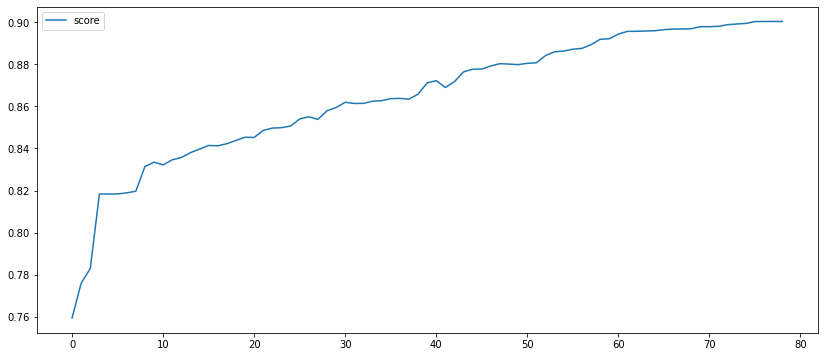

In [19]:
pd.DataFrame(score_list, columns=['score']).plot(figsize=(14, 6))

<AxesSubplot:>

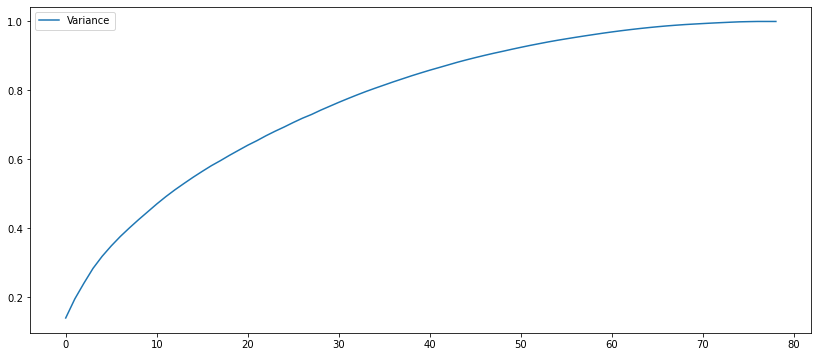

In [20]:
pd.DataFrame(variance_list, columns=['Variance']).plot(figsize=(14, 6))

## Now we have increase score and explained variance, so I am taking number_of_components = 20 where explained variance ~ 60% and score > 80%

In [21]:
pca = PCA(n_components=20)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)
print("original shape:   ", x_train_scaled.shape)
print("transformed shape:", x_train_pca.shape)

original shape:    (1456, 79)
transformed shape: (1456, 20)


In [22]:
regr = LinearRegression()
regr.fit(x_train_pca, y_train)
prediction = regr.predict(x_test_pca)
prediction = pd.DataFrame(prediction)

In [23]:
submission = pd.DataFrame(id_1)
submission = pd.concat([id_1, prediction], axis=1)

In [24]:
submission.columns = ['Id', 'Prediction']

In [26]:
submission.to_csv('Target_predicted_values.csv')

In [ ]:
submission